In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
avocado=pd.read_csv('avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df=pd.DataFrame(data=avocado)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['year'], dtype='object'),
 dtype('float64'): Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
        'Small Bags', 'Large Bags', 'XLarge Bags'],
       dtype='object'),
 dtype('O'): Index(['Date', 'type', 'region'], dtype='object')}

{'whiskers': [<matplotlib.lines.Line2D at 0x1f29c136e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1f29c143e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f29c136308>],
 'medians': [<matplotlib.lines.Line2D at 0x1f29c148f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f29c148f08>],
 'means': []}

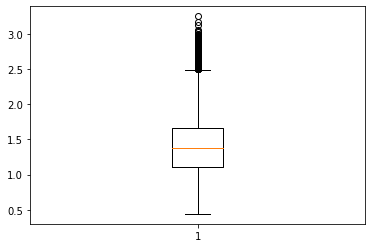

In [9]:
plt.boxplot(df['AveragePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23cf6f1bec8>,
 'caps': [<matplotlib.lines.Line2D at 0x23cf6f1fdc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cf6f1b408>],
 'medians': [<matplotlib.lines.Line2D at 0x23cf6f22d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x23cf6f22e48>],
 'means': []}

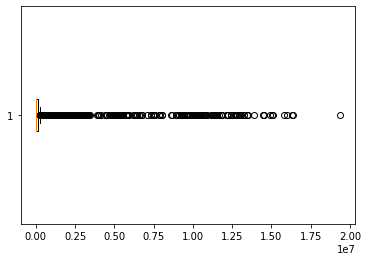

In [10]:
plt.boxplot(df['Total Bags'],vert=False)

{'bodies': [<matplotlib.collections.PolyCollection at 0x23cf6f8e9c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23cf6f83b48>,
 'cmins': <matplotlib.collections.LineCollection at 0x23cf6f99a48>,
 'cbars': <matplotlib.collections.LineCollection at 0x23cf6f999c8>}

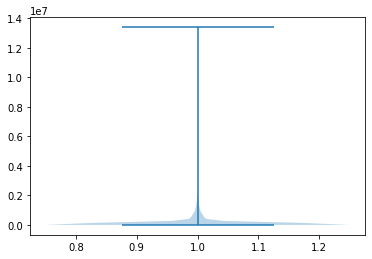

In [11]:
plt.violinplot(df['Small Bags'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x23cf700aec8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23cf6f8e8c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x23cf7011e08>,
 'cbars': <matplotlib.collections.LineCollection at 0x23cf7011d88>}

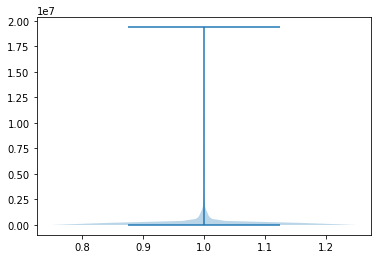

In [12]:
plt.violinplot(df['Total Bags'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x23cf707db48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23cf7073ac8>,
 'cmins': <matplotlib.collections.LineCollection at 0x23cf7085cc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x23cf7085c48>}

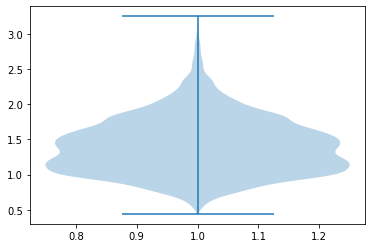

In [13]:
plt.violinplot(df['AveragePrice'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x23cf70dcd88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23cf70b6d88>,
 'cmins': <matplotlib.collections.LineCollection at 0x23cf7082d08>,
 'cbars': <matplotlib.collections.LineCollection at 0x23cf7082c48>}

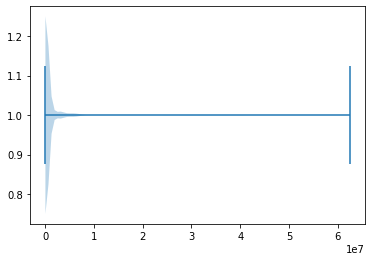

In [14]:
plt.violinplot(df['Total Volume'],vert=False)

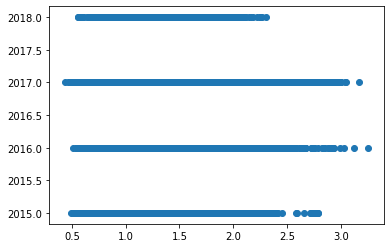

In [15]:
plt.scatter(x='AveragePrice',y='year',data=df)

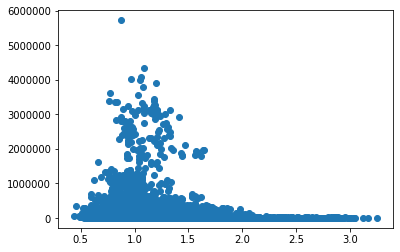

In [16]:
plt.scatter(x='AveragePrice',y='Large Bags',data=df)

In [17]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [97]:
newyork=df[df['region']=='NewYork']
neyo=newyork.head(10)
neyo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1456,2015-12-27,1.17,1129876.05,13711.19,872603.60,894.58,242666.68,208470.99,34191.25,4.44,conventional,2015,NewYork
1457,2015-12-20,1.23,1139347.98,13998.35,867406.68,803.83,257139.12,212615.20,44523.92,0.00,conventional,2015,NewYork
1458,2015-12-13,1.12,1254805.29,15990.38,975504.52,1657.92,261652.47,222446.62,39205.85,0.00,conventional,2015,NewYork
1459,2015-12-06,1.20,1068971.54,15730.10,887708.08,892.62,164640.74,136643.23,27997.51,0.00,conventional,2015,NewYork
1460,2015-11-29,1.16,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.00,conventional,2015,NewYork
1461,2015-11-22,1.14,1111803.12,15004.70,905344.06,1227.89,190226.47,156660.80,33558.60,7.07,conventional,2015,NewYork
1462,2015-11-15,1.04,1357393.34,23669.62,1107466.31,929.57,225327.84,196060.17,29267.67,0.00,conventional,2015,NewYork
1463,2015-11-08,1.13,1406262.16,20146.29,1097994.07,753.78,287368.02,198024.18,89343.84,0.00,conventional,2015,NewYork
1464,2015-11-01,1.06,2180520.22,24197.61,1916954.83,1226.57,238141.21,183727.03,54399.03,15.15,conventional,2015,NewYork
1465,2015-10-25,1.23,1048045.86,18035.94,790163.44,540.63,239305.85,192750.44,46555.41,0.00,conventional,2015,NewYork


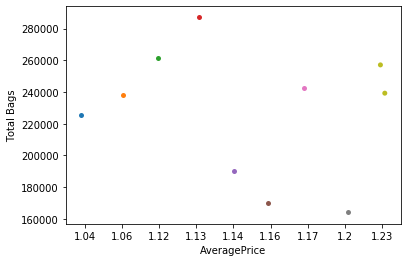

In [98]:
sns.stripplot(x='AveragePrice',y='Total Bags',data=neyo)

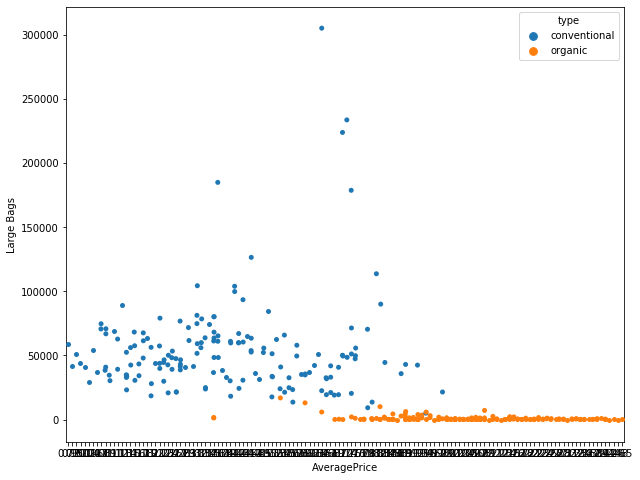

In [99]:
plt.figure(figsize=(10,8))
sns.stripplot('AveragePrice','Large Bags',hue='type',data=newyork)

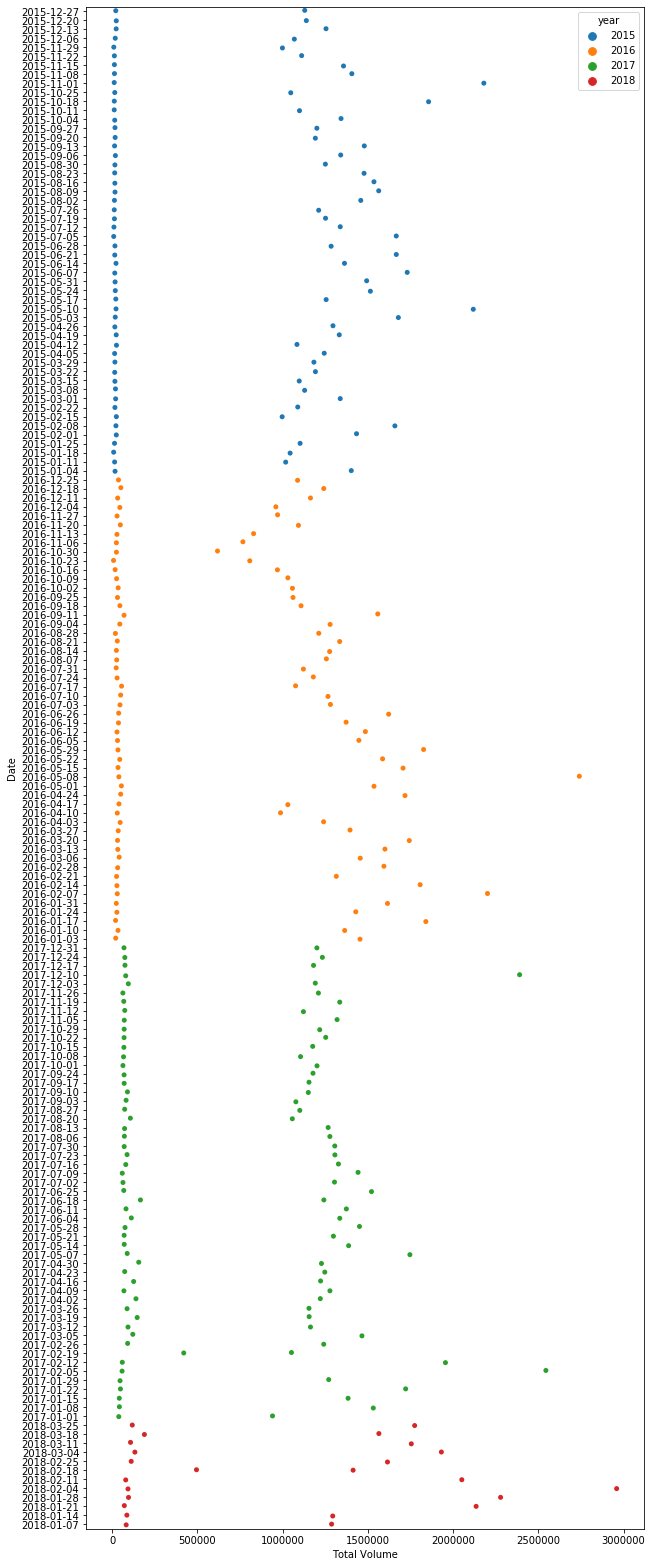

In [100]:
plt.figure(figsize=(10,28))
sns.stripplot('Total Volume','Date',hue='year',data=newyork)

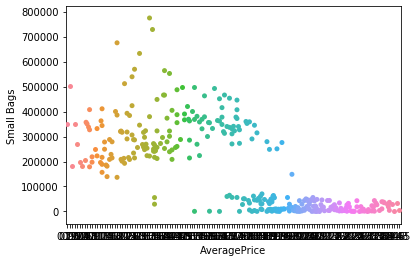

In [101]:
sns.swarmplot('AveragePrice','Small Bags',data=newyork)

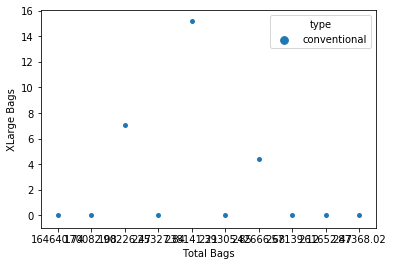

In [102]:
sns.swarmplot('Total Bags','XLarge Bags',hue='type',data=neyo)

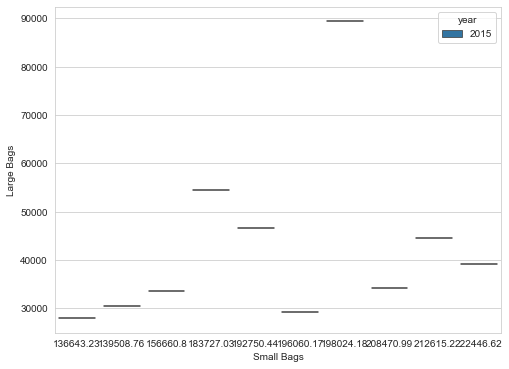

In [103]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.violinplot('Small Bags','Large Bags',hue='year',data=neyo)

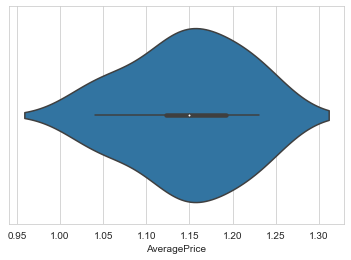

In [104]:
sns.violinplot(neyo['AveragePrice'])

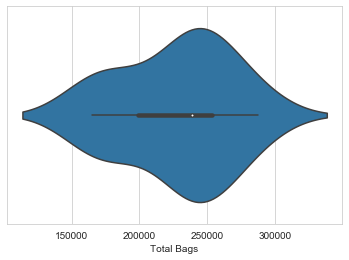

In [105]:
sns.violinplot(neyo['Total Bags'])

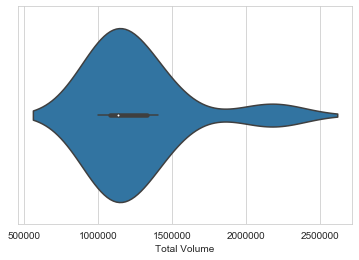

In [106]:
sns.violinplot(neyo['Total Volume'])

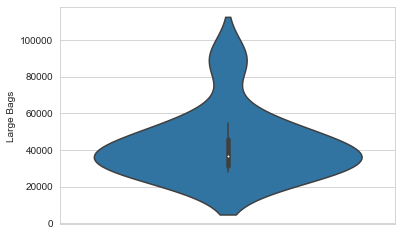

In [107]:
sns.violinplot(y='Large Bags',data=neyo)

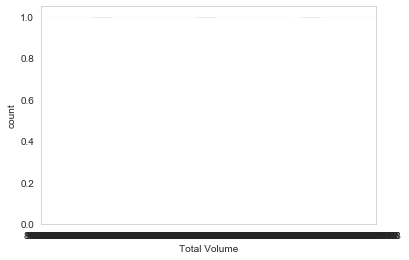

In [108]:
sns.countplot(newyork['Total Volume'])

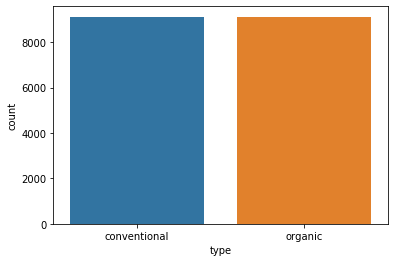

In [31]:
sns.countplot(df['type'])

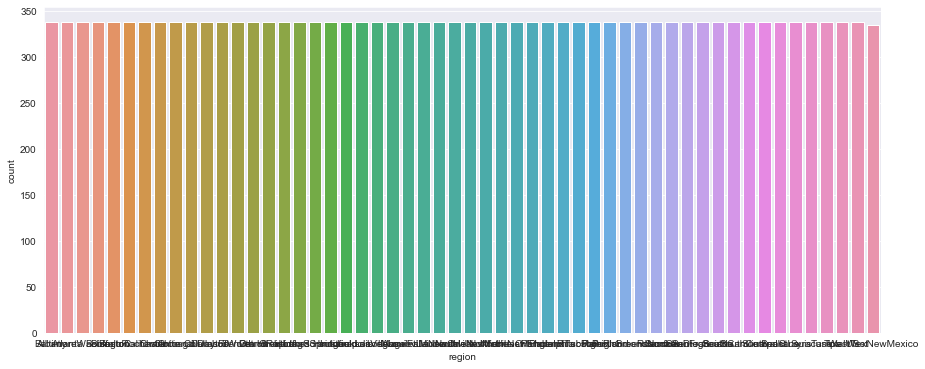

In [31]:
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.countplot(df['region'])

In [32]:
org=df[df['type']=='organic']
orga=org.head(15)
orga

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany
9131,2015-11-22,1.94,858.83,13.84,84.18,0.0,760.81,755.69,5.12,0.0,organic,2015,Albany
9132,2015-11-15,1.89,1208.54,20.71,238.16,0.0,949.67,949.67,0.00,0.0,organic,2015,Albany
9133,2015-11-08,1.88,1332.27,20.08,351.40,0.0,960.79,960.79,0.00,0.0,organic,2015,Albany
9134,2015-11-01,1.88,1021.68,11.47,137.58,0.0,872.63,872.63,0.00,0.0,organic,2015,Albany
9135,2015-10-25,1.83,1161.90,49.27,148.96,0.0,963.67,963.67,0.00,0.0,organic,2015,Albany


In [33]:
orgt=org.tail(20)
orgt

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18229,2018-02-25,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,organic,2018,West
18230,2018-02-18,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,organic,2018,West
18231,2018-02-11,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,organic,2018,West
18232,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West
18236,2018-01-07,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West
18237,2018-03-25,1.62,15303.40,2325.30,2171.66,0.00,10806.44,10569.80,236.64,0.00,organic,2018,WestTexNewMexico
18238,2018-03-18,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,organic,2018,WestTexNewMexico


(array([  36.,  242.,  954., 2659., 2770., 1595.,  593.,  177.,   86.,
          11.]),
 array([0.44 , 0.721, 1.002, 1.283, 1.564, 1.845, 2.126, 2.407, 2.688,
        2.969, 3.25 ]),
 <a list of 10 Patch objects>)

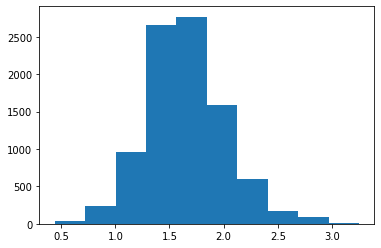

In [34]:
plt.hist(org['AveragePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19c57a5afc8>,
 'caps': [<matplotlib.lines.Line2D at 0x19c57a5db88>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c57a5a788>],
 'medians': [<matplotlib.lines.Line2D at 0x19c57a61b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x19c57a66988>],
 'means': []}

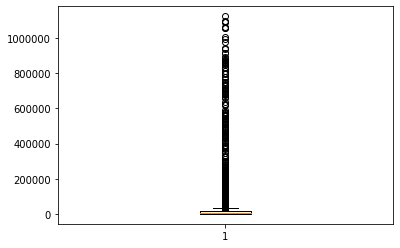

In [35]:
plt.boxplot(org['Total Bags'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19c57abde48>,
 'caps': [<matplotlib.lines.Line2D at 0x19c57ac2e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c57abdc48>],
 'medians': [<matplotlib.lines.Line2D at 0x19c57ac6e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x19c57accc88>],
 'means': []}

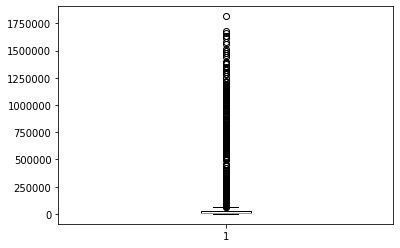

In [36]:
plt.boxplot(org['Total Volume'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x19c57b26888>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x19c57b19448>,
 'cmins': <matplotlib.collections.LineCollection at 0x19c57b2d908>,
 'cbars': <matplotlib.collections.LineCollection at 0x19c57b2de48>}

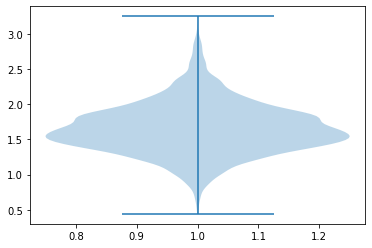

In [37]:
plt.violinplot(org['AveragePrice'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x19c58b5e648>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x19c58b522c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x19c58b5ee08>,
 'cbars': <matplotlib.collections.LineCollection at 0x19c58b65cc8>}

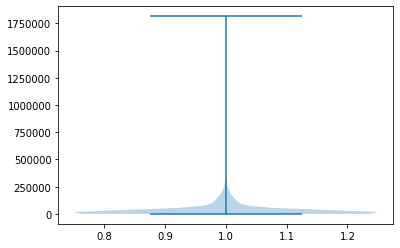

In [38]:
plt.violinplot(org['Total Volume'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x19c58bcaa48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x19c58b5e448>,
 'cmins': <matplotlib.collections.LineCollection at 0x19c58bd39c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x19c58bd3948>}

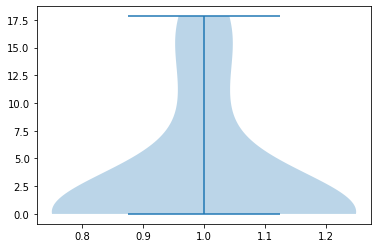

In [39]:
plt.violinplot(orga['Large Bags'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x19c58c3a848>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x19c58c2f3c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x19c58c3afc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x19c58c43dc8>}

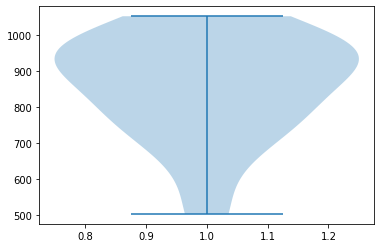

In [40]:
plt.violinplot(orga['Total Bags'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x19c5795e908>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x19c58c3a608>,
 'cmins': <matplotlib.collections.LineCollection at 0x19c58c89ac8>,
 'cbars': <matplotlib.collections.LineCollection at 0x19c58c89fc8>}

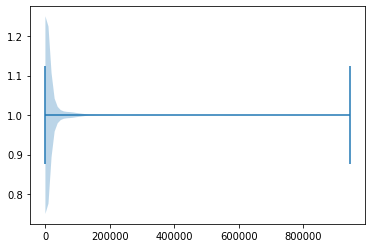

In [41]:
plt.violinplot(org['Small Bags'],vert=False)

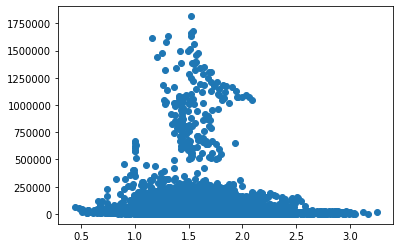

In [42]:
plt.scatter('AveragePrice','Total Volume',data=org)

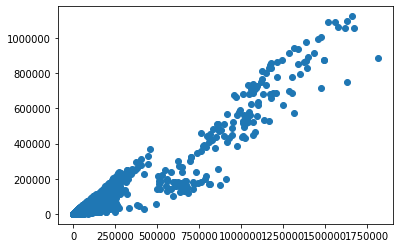

In [43]:
plt.scatter('Total Volume','Total Bags',data=org)

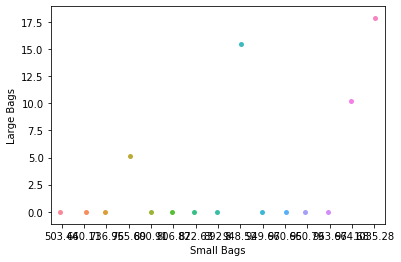

In [44]:
sns.stripplot('Small Bags','Large Bags',data=orga)

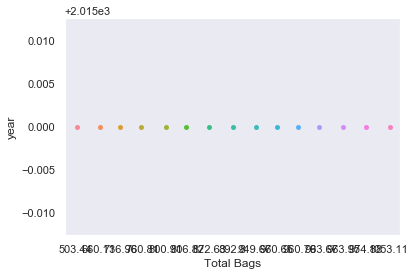

In [45]:
sns.set(style='dark')
sns.stripplot('Total Bags','year',data=orga)

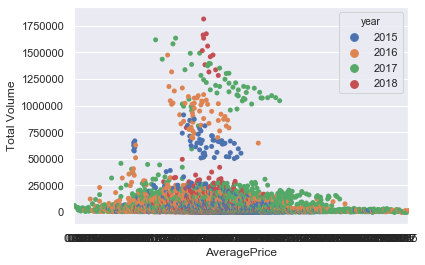

In [46]:
sns.set_style('darkgrid')
sns.swarmplot('AveragePrice','Total Volume',hue='year',data=org)

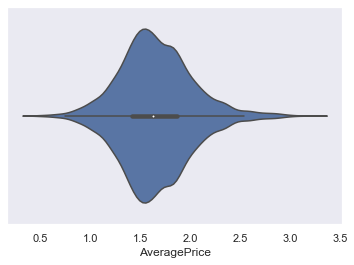

In [46]:
sns.violinplot(org['AveragePrice'])

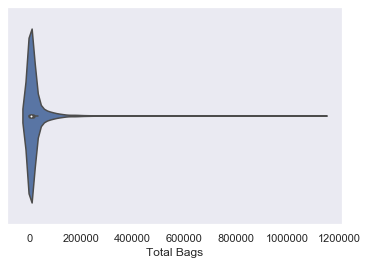

In [47]:
sns.violinplot(org['Total Bags'])

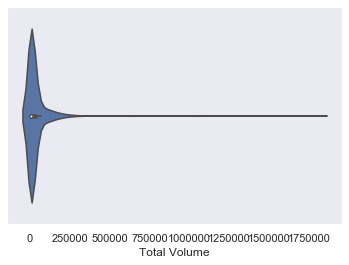

In [48]:
sns.violinplot(org['Total Volume'])

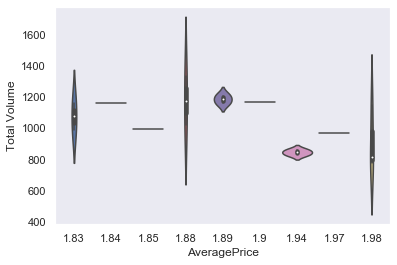

In [49]:
sns.violinplot('AveragePrice','Total Volume',data=orga)

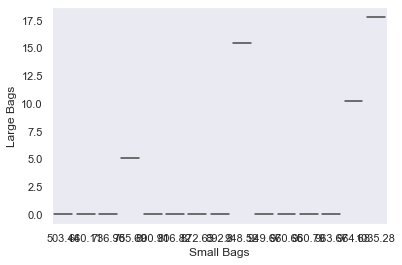

In [50]:
sns.violinplot('Small Bags','Large Bags',data=orga)

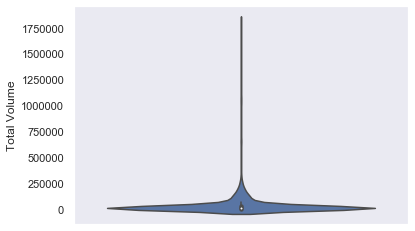

In [51]:
sns.violinplot(y='Total Volume',data=org)

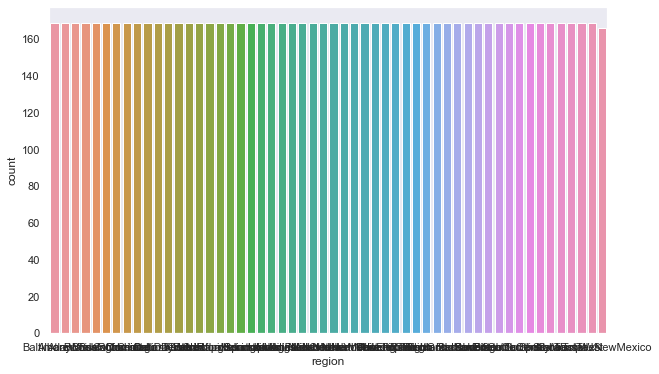

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(org['region'])

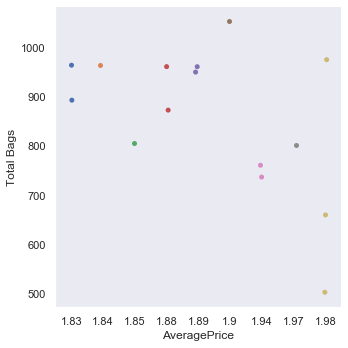

In [210]:
sns.catplot('AveragePrice','Total Bags',data=orga)

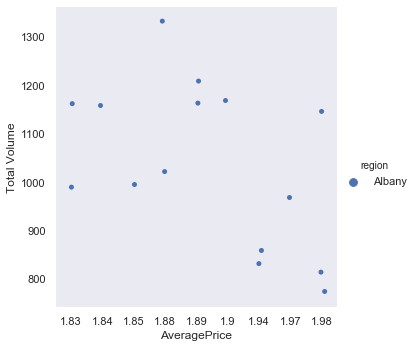

In [211]:
sns.catplot('AveragePrice','Total Volume',hue='region',data=orga)

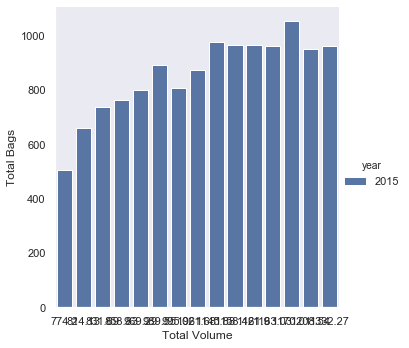

In [212]:
sns.catplot('Total Volume','Total Bags',hue='year',data=orga,kind='bar')

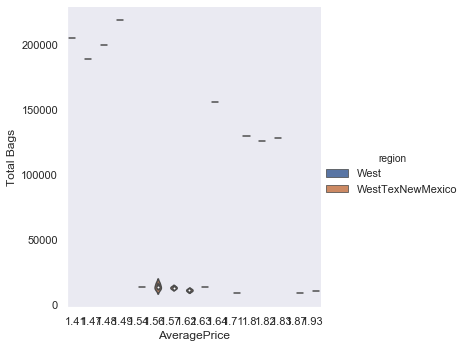

In [213]:
sns.catplot('AveragePrice','Total Bags',hue='region',data=orgt,kind='violin')

<Figure size 720x432 with 0 Axes>

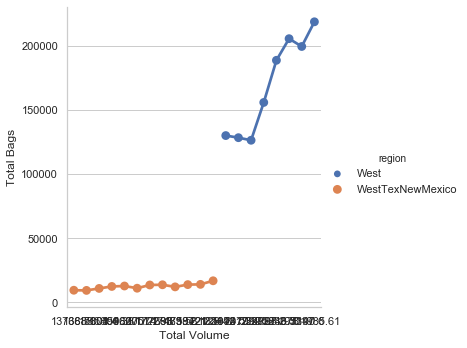

In [214]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.catplot('Total Volume','Total Bags',hue='region',data=orgt,kind='point')

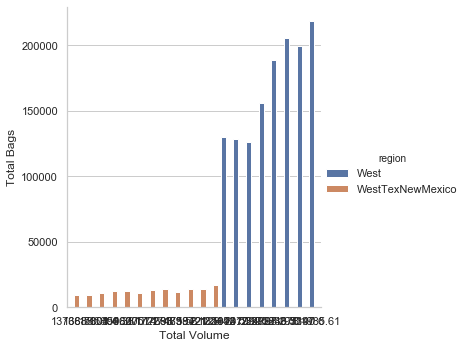

In [215]:
sns.catplot('Total Volume','Total Bags',hue='region',data=orgt,kind='bar')

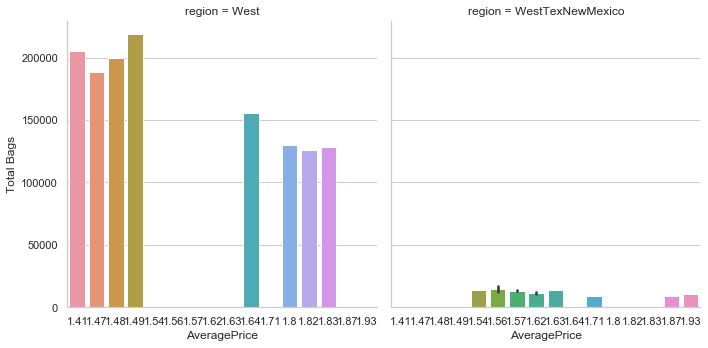

In [216]:
sns.catplot('AveragePrice','Total Bags',col='region',data=orgt,kind='bar')

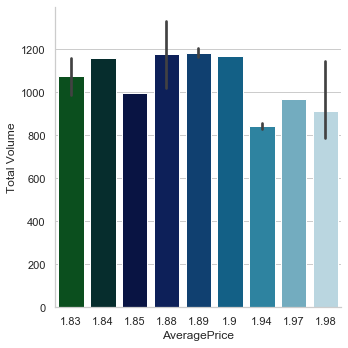

In [217]:
sns.catplot('AveragePrice','Total Volume',data=orga,palette='ocean',kind='bar')

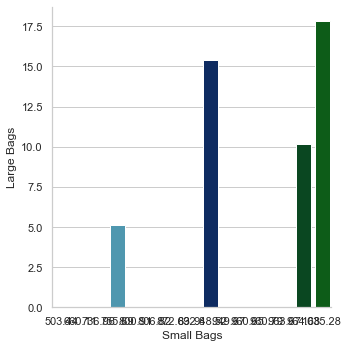

In [218]:
sns.catplot('Small Bags','Large Bags',data=orga,palette='ocean_r',kind='bar')

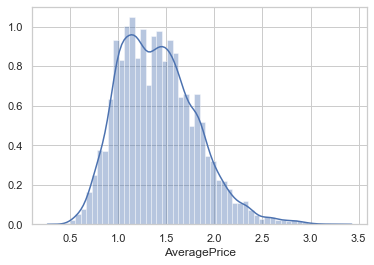

In [219]:
sns.distplot(df['AveragePrice'])

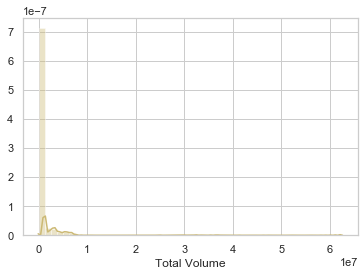

In [220]:
sns.distplot(df['Total Volume'],color='y')

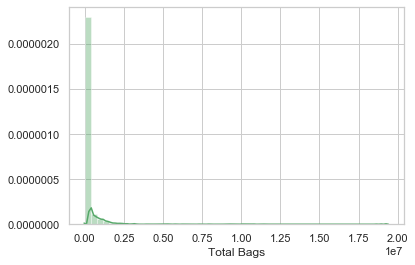

In [221]:
sns.distplot(df['Total Bags'],color='g')

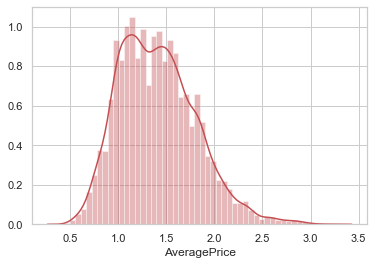

In [222]:
sns.distplot(df['AveragePrice'],color='r')

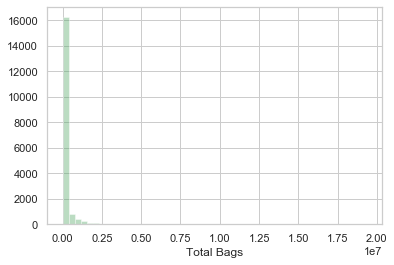

In [223]:
sns.distplot(df['Total Bags'],color='g',kde=False)

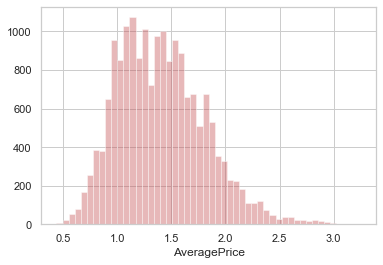

In [224]:
sns.distplot(df['AveragePrice'],color='r',kde=False)

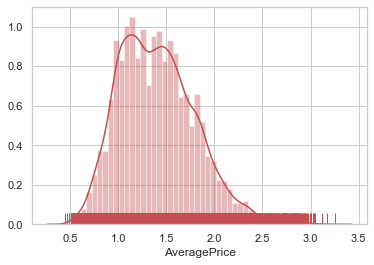

In [225]:
sns.distplot(df['AveragePrice'],color='r',rug=True)

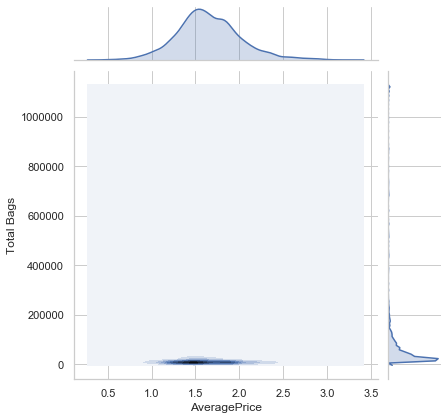

In [226]:
sns.jointplot('AveragePrice','Total Bags',data=org,kind='kde')

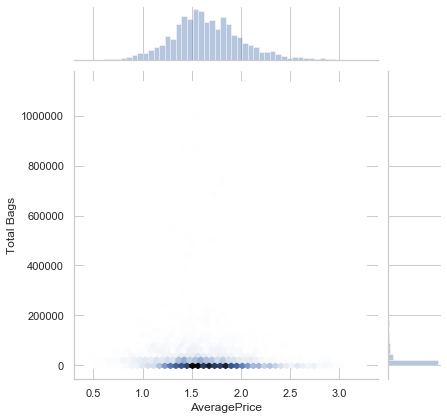

In [71]:
sns.jointplot('AveragePrice','Total Bags',data=org,kind='hex')

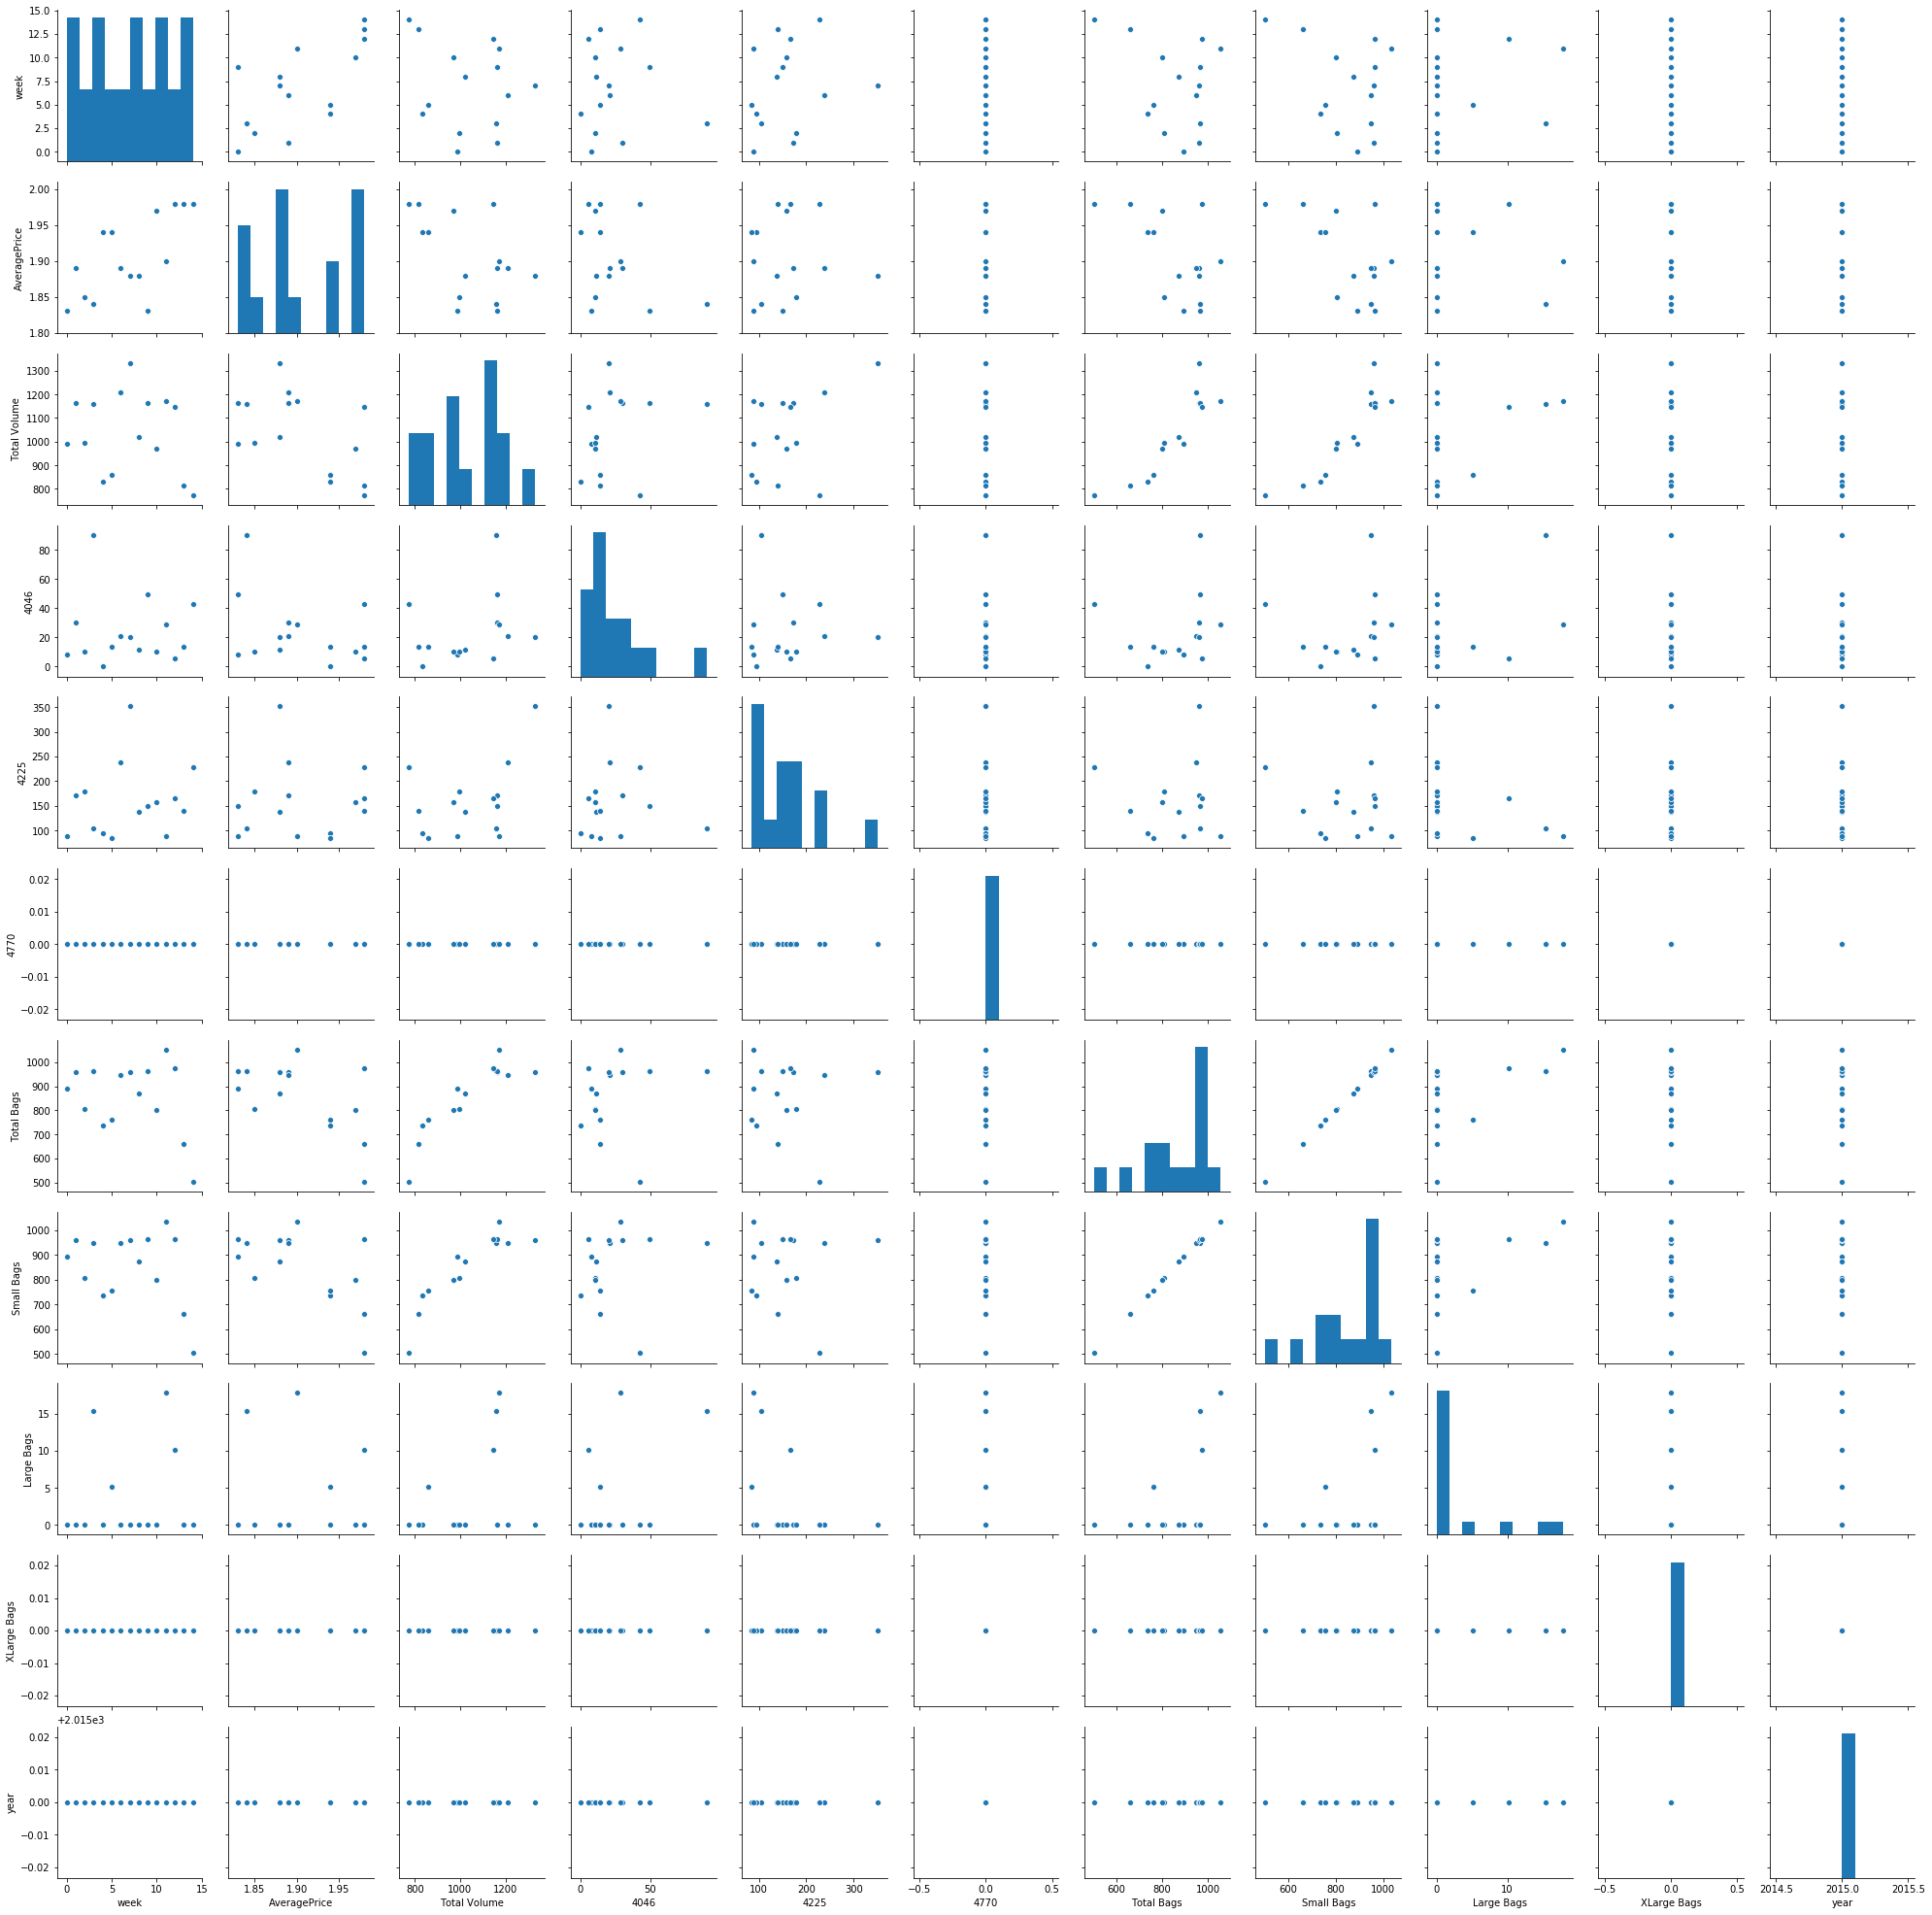

In [16]:
sns.pairplot(orga)

In [10]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [12]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [13]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

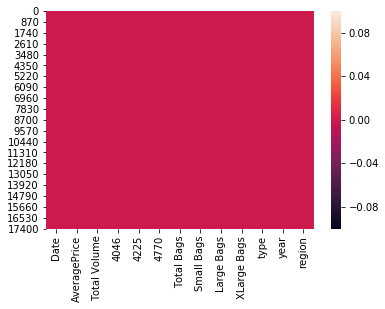

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [16]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [17]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [18]:
df=pd.get_dummies(df,columns=['type'],drop_first=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0


In [19]:
print('conventional',df[df['type_organic']==1]['Date'].count())
print('organic',df[df['type_organic']==0]['Date'].count())

conventional 9123
organic 9126


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
df['region']=le.fit_transform(df['region'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


In [23]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,26.495644,0.499918
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,15.583788,0.500014
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,13.000000,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,26.000000,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,40.000000,1.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,53.000000,1.000000


In [24]:
df.shape

(18249, 13)

In [25]:
import datetime as dt

In [26]:
df['Date']=pd.to_datetime(df['Date'])

In [27]:
df['Date']=df['Date'].map(dt.datetime.toordinal)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


In [28]:
df.dtypes

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region            int32
type_organic      uint8
dtype: object

In [29]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,735959,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,735952,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,735945,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,735938,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,735931,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


In [30]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
region           0.000030
type_organic     0.000329
dtype: float64

In [31]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]= np.log1p(df[col])

In [32]:
df.skew()

Date            0.000117
AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
region          0.000030
type_organic    0.000329
dtype: float64

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
region          AxesSubplot(0.285345,0.321957;0.133621x0.16413)
type_organic     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

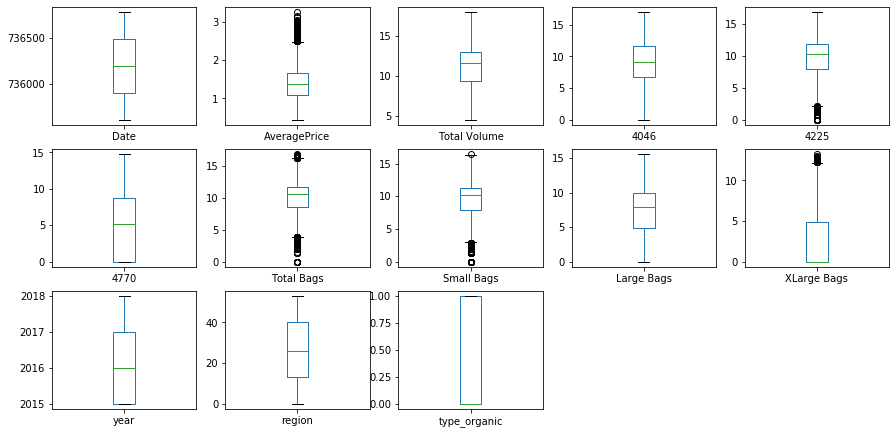

In [33]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [34]:
zscore(df)

array([[-0.67635986, -0.18868864, -0.10728205, ..., -1.22128204,
        -1.7002522 , -0.99983562],
       [-0.69685742, -0.13901962, -0.1759487 , ..., -1.22128204,
        -1.7002522 , -0.99983562],
       [-0.71735497, -1.18206895,  0.15869039, ..., -1.22128204,
        -1.7002522 , -0.99983562],
       ...,
       [ 1.53737632,  1.15237477, -0.77890112, ...,  1.97050371,
         1.70081131,  1.00016441],
       [ 1.51687877,  1.30138182, -0.70779758, ...,  1.97050371,
         1.70081131,  1.00016441],
       [ 1.49638121,  0.53151208, -0.67454176, ...,  1.97050371,
         1.70081131,  1.00016441]])

In [35]:
z=np.abs(zscore(df))
print(z)

[[0.67635986 0.18868864 0.10728205 ... 1.22128204 1.7002522  0.99983562]
 [0.69685742 0.13901962 0.1759487  ... 1.22128204 1.7002522  0.99983562]
 [0.71735497 1.18206895 0.15869039 ... 1.22128204 1.7002522  0.99983562]
 ...
 [1.53737632 1.15237477 0.77890112 ... 1.97050371 1.70081131 1.00016441]
 [1.51687877 1.30138182 0.70779758 ... 1.97050371 1.70081131 1.00016441]
 [1.49638121 0.53151208 0.67454176 ... 1.97050371 1.70081131 1.00016441]]


In [36]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
(18249, 13)


In [37]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

In [38]:
Q1

Date            735896.000000
AveragePrice         1.100000
Total Volume         9.290960
4046                 6.751183
4225                 8.009622
4770                 0.000000
Total Bags           8.534962
Small Bags           7.955222
Large Bags           4.855695
XLarge Bags          0.000000
year              2015.000000
region              13.000000
type_organic         0.000000
Name: 0.25, dtype: float64

In [39]:
Q3

Date            736484.000000
AveragePrice         1.660000
Total Volume        12.978408
4046                11.617476
4225                11.919775
4770                 8.739444
Total Bags          11.615341
Small Bags          11.330668
Large Bags          10.000172
XLarge Bags          4.894101
year              2017.000000
region              40.000000
type_organic         1.000000
Name: 0.75, dtype: float64

In [40]:
IQR=Q3-Q1
IQR

Date            588.000000
AveragePrice      0.560000
Total Volume      3.687449
4046              4.866293
4225              3.910153
4770              8.739444
Total Bags        3.080379
Small Bags        3.375446
Large Bags        5.144476
XLarge Bags       4.894101
year              2.000000
region           27.000000
type_organic      1.000000
dtype: float64

In [41]:
print((df<(Q1-1.5 * IQR))|(df>(Q3+1.5 * IQR)))

        Date  AveragePrice  Total Volume   4046   4225   4770  Total Bags  \
0      False         False         False  False  False  False       False   
1      False         False         False  False  False  False       False   
2      False         False         False  False  False  False       False   
3      False         False         False  False  False  False       False   
4      False         False         False  False  False  False       False   
...      ...           ...           ...    ...    ...    ...         ...   
18244  False         False         False  False  False  False       False   
18245  False         False         False  False  False  False       False   
18246  False         False         False  False  False  False       False   
18247  False         False         False  False  False  False       False   
18248  False         False         False  False  False  False       False   

       Small Bags  Large Bags  XLarge Bags   year  region  type_organic  
0

In [42]:
df_new=df[(z<3).all(axis=1)]

In [43]:
print(df.shape)
print(df_new.shape)

(18249, 13)
(17834, 13)


In [44]:
df=df_new
print('shape after removing outliers:',df.shape)

shape after removing outliers: (17834, 13)


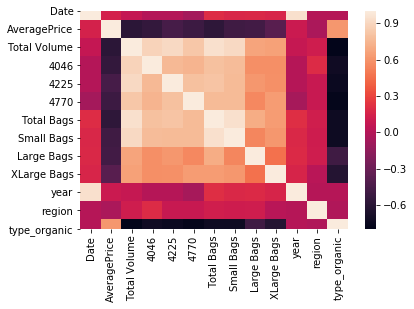

In [45]:
sns.heatmap(df.corr())

[]

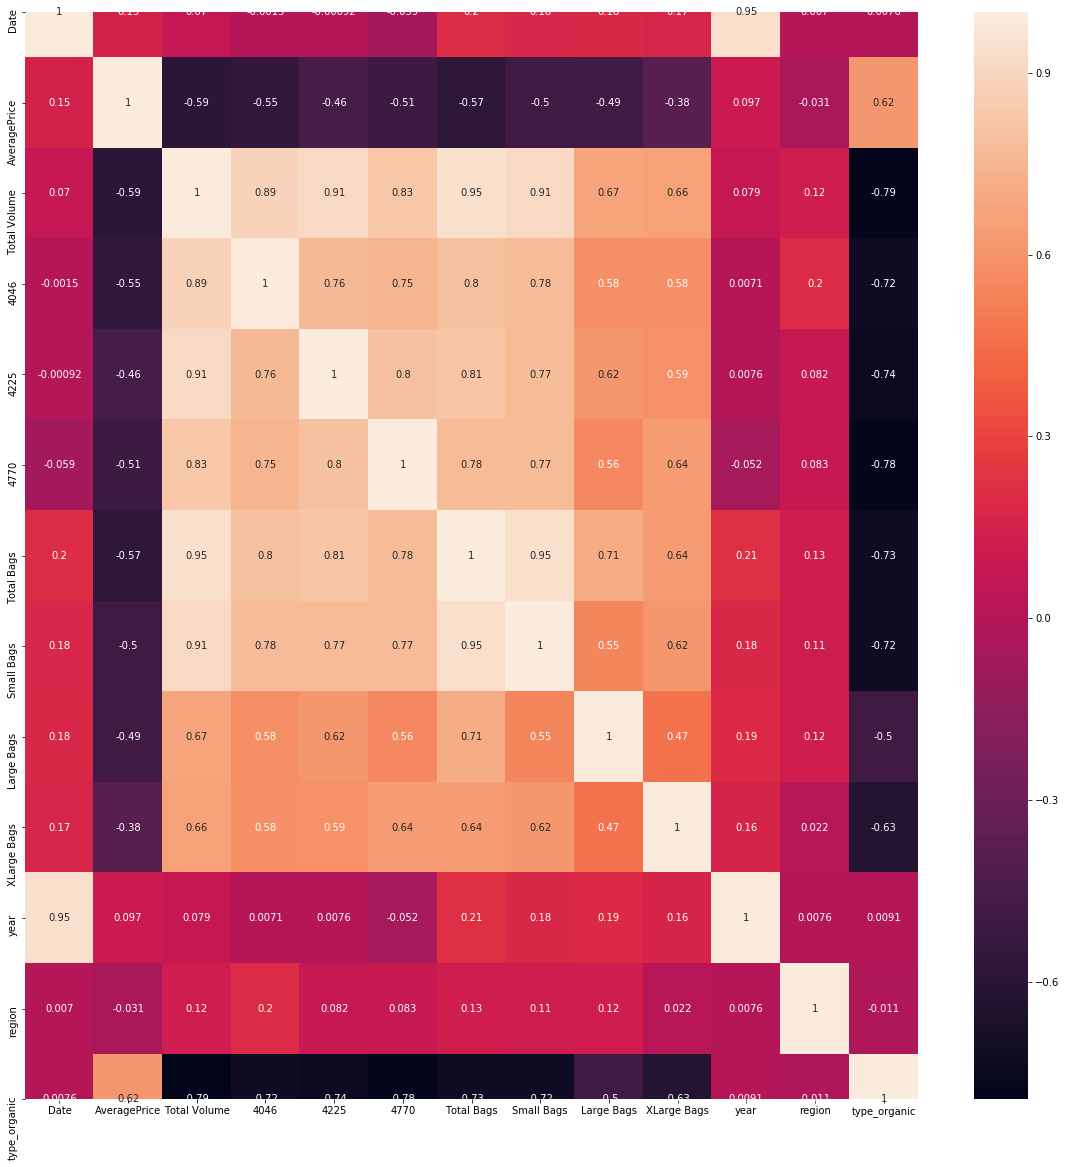

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.plot()

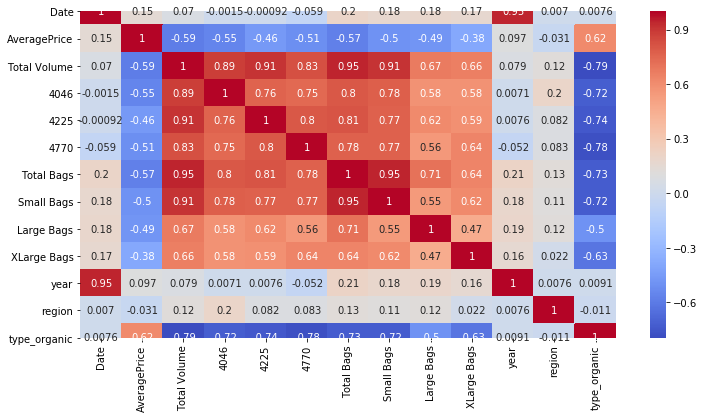

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [48]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region', 'type_organic'],
      dtype='object')

In [49]:
df.shape

(17834, 13)

In [50]:
x=df.drop(['AveragePrice','Date'],axis=1)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,0,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,0,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,0,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,0,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,2018,53,1
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,2018,53,1
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,2018,53,1
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,2018,53,1


In [51]:
y=df['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17834, dtype: float64

In [52]:
y=le.fit_transform(y)
y

array([ 86,  88,  46, ..., 140, 146, 115], dtype=int64)

In [53]:
models_reg=[KNeighborsRegressor(),DecisionTreeRegressor(),LinearRegression()]

In [54]:
max_r2_score=0
for r_state in range(40,55):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=r_state)
    for m in models_reg:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        r2_value=r2_score(y_test,predm)
        print('R2 score correspond to random state',r_state ,'is',r2_value)
        if r2_value>max_r2_score:
            max_r2_score=r2_value
            final_state=r_state
            final_model=m
print()
print()
print()
print('ma r2 score correspond to random state',final_state,'is',max_r2_score,'and model_reg is',final_model)

R2 score correspond to random state 40 is 0.8303102621744977
R2 score correspond to random state 40 is 0.7027124328588701
R2 score correspond to random state 40 is 0.5298963134153403
R2 score correspond to random state 41 is 0.8158927954431376
R2 score correspond to random state 41 is 0.6706748748731673
R2 score correspond to random state 41 is 0.5452326065706214
R2 score correspond to random state 42 is 0.8249248208836248
R2 score correspond to random state 42 is 0.6722992678502729
R2 score correspond to random state 42 is 0.532729702182229
R2 score correspond to random state 43 is 0.8223095620031624
R2 score correspond to random state 43 is 0.6461234951556971
R2 score correspond to random state 43 is 0.5279618182398411
R2 score correspond to random state 44 is 0.8312883424725255
R2 score correspond to random state 44 is 0.6870837606700881
R2 score correspond to random state 44 is 0.5376067811115666
R2 score correspond to random state 45 is 0.8195362234981033
R2 score correspond to ra

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.24,random_state=46)

In [55]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
predknr=knr.predict(x_test)
r2_sc=r2_score(y_test,predknr)
print('R2 Score:',r2_sc*100)
print(mean_squared_error(y_test,predknr))
print(mean_absolute_error(y_test,predknr))
print(np.sqrt(mean_absolute_error(y_test,predknr)))

R2 Score: 83.16770667416304
250.4194907731838
11.396963326325624
3.375938880715352


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameter={'n_neighbors':range(1,30)}
grid=GridSearchCV(knr,parameter)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.803253437588471
{'n_neighbors': 3}


In [58]:
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
predknr=knr.predict(x_test)
r2_sc=r2_score(y_test,predknr)
print('R2 Score:',r2_sc*100)
print(mean_squared_error(y_test,predknr))
print(mean_absolute_error(y_test,predknr))
print(np.sqrt(mean_absolute_error(y_test,predknr)))

R2 Score: 84.17998514365127
235.35949544498948
10.929845051779179
3.3060316168753103


In [59]:
score=cross_val_score(knr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-1.06137211  0.30978132  0.42932359  0.0279695  -0.09014439]
-0.07688841840970255
0.5265250478061285


Text(0, 0.5, 'Predicted values of Y')

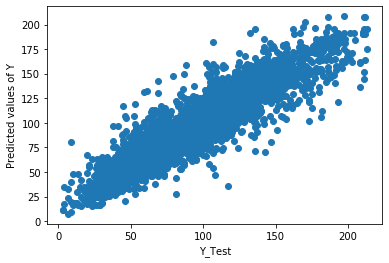

In [60]:
plt.scatter(y_test,predknr)
plt.xlabel('Y_Test')
plt.ylabel('Predicted values of Y')

In [61]:
# Now i am going to use classification models for prediction with region label.

In [62]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region', 'type_organic'],
      dtype='object')

In [63]:
x_c=df.drop(['region','Date'],axis=1)
x_c

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,2018,1
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,2018,1
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,2018,1
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,2018,1


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scale=StandardScaler()

In [66]:
x_c=scale.fit_transform(x_c)

In [67]:
y_c=df['region']
y_c

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17834, dtype: int32

In [68]:
model_class=[DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression()]

In [69]:
max_accu_score=0
for r_state in range(40,55):
    xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,test_size=.22,random_state=r_state)
    for c in model_class:
        c.fit(xc_train,yc_train)
        c.score(xc_train,yc_train)
        predc=c.predict(xc_test)
        accu_value=accuracy_score(yc_test,predc)
        print('Accuracy score correspond to random state',r_state ,'is',accu_value)
        if accu_value>max_accu_score:
            max_accu_score=accu_value
            final_state=r_state
            final_model=c
print()
print()
print()
print('Maximum Accuracy score correspond to random state',final_state,'is',max_accu_score,'and model_reg is',final_model)

Accuracy score correspond to random state 40 is 0.8053007135575942
Accuracy score correspond to random state 40 is 0.8529561671763507
Accuracy score correspond to random state 40 is 0.4350152905198777
Accuracy score correspond to random state 41 is 0.795361875637105
Accuracy score correspond to random state 41 is 0.8335881753312946
Accuracy score correspond to random state 41 is 0.44036697247706424
Accuracy score correspond to random state 42 is 0.8009683995922529
Accuracy score correspond to random state 42 is 0.8419979612640163
Accuracy score correspond to random state 42 is 0.44801223241590216
Accuracy score correspond to random state 43 is 0.7897553516819572
Accuracy score correspond to random state 43 is 0.8470948012232415
Accuracy score correspond to random state 43 is 0.45310907237512743
Accuracy score correspond to random state 44 is 0.799184505606524
Accuracy score correspond to random state 44 is 0.8402140672782875
Accuracy score correspond to random state 44 is 0.43985728848

In [74]:
xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,test_size=.22,random_state=46)

In [75]:
knc=KNeighborsClassifier()
knc.fit(xc_train,yc_train)
knc.score(xc_train,yc_train)
predknc=knc.predict(xc_test)
print(accuracy_score(yc_test,predknc))
print(confusion_matrix(yc_test,predknc))
print(classification_report(yc_test,predknc))

0.8557594291539246
[[66  0  0 ...  0  0  0]
 [ 0 49  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  0  0 ...  0  0 54]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.87        72
           1       0.73      0.68      0.71        72
           2       0.86      1.00      0.92        71
           3       0.89      0.81      0.85        68
           4       0.93      0.93      0.93        74
           5       0.81      0.73      0.77        77
           6       0.94      0.99      0.96        78
           7       0.73      0.85      0.78        72
           8       0.94      0.96      0.95        80
           9       0.77      0.79      0.78        71
          10       0.74      0.81      0.77        79
          11       0.87      0.94      0.90        84
          12       0.93      0.89      0.91        64
          13       0.72      0.78      0.75        74
          14  

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameter={'n_neighbors':range(1,30)}
knc=KNeighborsClassifier()
grid=GridSearchCV(estimator=knc,param_grid=parameter)
grid.fit(xc_train,yc_train)
print(grid.best_score_)
print(grid.best_params_)

0.8496764917325665
{'n_neighbors': 1}


In [78]:
knc=KNeighborsClassifier(n_neighbors=1)
knc.fit(xc_train,yc_train)
knc.score(xc_train,yc_train)
predknc=knc.predict(xc_test)
print(accuracy_score(yc_test,predknc))
print(confusion_matrix(yc_test,predknc))
print(classification_report(yc_test,predknc))

0.8881243628950051
[[66  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  1]
 [ 0  0 70 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  0 ...  0  0 56]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        72
           1       0.84      0.75      0.79        72
           2       0.90      0.99      0.94        71
           3       0.92      0.85      0.89        68
           4       0.93      0.93      0.93        74
           5       0.86      0.79      0.82        77
           6       1.00      0.97      0.99        78
           7       0.82      0.89      0.85        72
           8       0.97      0.96      0.97        80
           9       0.82      0.76      0.79        71
          10       0.82      0.81      0.82        79
          11       0.93      0.96      0.95        84
          12       0.94      0.97      0.95        64
          13       0.78      0.84      0.81        74
          14  

In [79]:
score=cross_val_score(knc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.01506024 0.00775194 0.01008969 0.00681044 0.00690052]
0.009322565052919157
0.0031033318201271376


In [91]:
from sklearn.externals import joblib

In [92]:
joblib.dump(knc,'avocadoFile.obj')

['avocadoFile.obj']